사용한 데이터 셋
https://www.kaggle.com/datasets/thedevastator/predicting-credit-card-customer-attrition-with-m/data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False ## 마이너스 부호 깨짐 방지

## 용어정리
- CLIENTNUM: 각 고객을 고유하게 식별하는 정수형 식별자입니다.
- **`Attrition_Flag`**: 이진형 변수로, 고객이 이탈했는지 여부를 나타냅니다. 이탈했다면 True (1), 이탈하지 않았다면 False (0)입니다.
- Customer_Age: 고객의 나이를 나타내는 정수형 변수입니다.
- Gender: 고객의 성별을 나타내는 문자열 변수입니다.
- Dependent_count: 고객이 부양하는 가족의 수를 나타내는 정수형 변수입니다.
- Education_Level: 고객의 교육 수준을 나타내는 문자열 변수입니다.
- Marital_Status: 고객의 결혼 여부를 나타내는 문자열 변수입니다.
- Income_Category: 고객의 소득 카테고리를 나타내는 문자열 변수입니다.
- Card_Category: 고객이 소지한 신용카드의 종류를 나타내는 문자열 변수입니다.
- Months_on_book: 고객이 신용카드를 사용한 기간을 나타내는 정수형 변수입니다.
- Total_Relationship_Count: 고객이 신용카드 제공자와 가지고 있는 총 관계의 수를 나타내는 정수형 변수입니다.
- Months_Inactive_12_mon: 지난 12개월 동안 고객이 비활성 상태였던 달의 수를 나타내는 정수형 변수입니다.
- Contacts_Count_12_mon: 지난 12개월 동안 고객이 가지고 있던 연락 횟수를 나타내는 정수형 변수입니다.
- Credit_Limit: 고객의 신용한도를 나타내는 정수형 변수입니다.
- Total_Revolving_Bal: 고객의 회전잔액 총액을 나타내는 정수형 변수입니다.
- Avg_Open_To_Buy: 평균 여유 신용한도를 나타내는 정수형 변수입니다.
- Total_Amt_Chng_Q4_Q1: 4분기에서 1분기로의 총 금액 변동을 나타내는 정수형 변수입니다.
- Total_Trans_Amt: 총 거래 금액을 나타내는 정수형 변수입니다.
- Total_Trans_Ct: 총 거래 횟수를 나타내는 정수형 변수입니다.
- Total_Ct_Chng_Q4_Q1: 4분기에서 1분기로의 총 거래 횟수 변동을 나타내는 정수형 변수입니다.
- Avg_Utilization_Ratio: 평균 이용률 비율을 나타내는 정수형 변수입니다.
- Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1: 다음과 같은 특성을 기반으로 누군가 이탈할지 여부를 예측하기 위한 Naive Bayes 분류기

# 데이터셋

In [2]:
df = pd.read_csv("D:/2차프로젝트/BankChurners.csv")

## Naive_Bayes 컬럼은 삭제 - 예측한 결과는 필요가 없다
df.drop(['CLIENTNUM',
         'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 
         'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis=1, inplace=True)

## Attrited Customer = 1, Existing Customer = 0 으로 수정
# df.replace({"Attrited Customer":1, "Existing Customer":0}, inplace=True)
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


## 연속형 변수 중 범주형으로 변환

In [3]:
## 나이별 구간 컬럼 생성
def group_age(x):
    if x < 30:
        return '20대'
    elif 30 <= x < 40:
        return '30대'
    elif 40 <= x < 50:
        return '40대'
    elif 50 <= x < 60:
        return '50대'
    elif 60 <= x < 70:
        return '60대'
    else:
        return '70대'

df['age_group'] = df['Customer_Age'].apply(group_age) 

In [4]:
## 나이별 구간 컬럼 생성
def group_month(x):
    if x < 24:
        return '1년이상2년미만'
    elif 24 <= x < 36:
        return '2년이상3년미만'
    elif 36 <= x < 48:
        return '3년이상4년미만'
    elif 48 <= x:
        return '4년이상'
        
df['Months_on_book_group'] = df['Months_on_book'].apply(group_month) 

## 파생변수 생성

In [5]:
## 고객의 신용 한도('Credit_Limit') 대비 고객의 나이('Customer_Age') 
## 고객의 나이에 대비해 얼마나 큰 신용 한도를 부여받았는지를 나타내며, 이를 통해 신용카드 회사의 신용 한도 설정 정책을 분석할 수 있다.
## 나이가 많을수록 신용한도가 줄어드는지 줄어든다면 소득, 카드 종류, 카드 제공자와의 관계를 확인할 수 있다.
df['Credit_to_Age_Ratio'] = df['Credit_Limit'] / df['Customer_Age']
df[['Credit_to_Age_Ratio','Customer_Age']]

,Credit_to_Age_Ratio,Customer_Age
0,282.022222,45
1,168.489796,49
2,67.019608,51
3,82.825000,40
4,117.900000,40
...,...,...
10122,80.060000,50
10123,104.317073,41
10124,122.931818,44
10125,176.033333,30


In [6]:
## 고객이 신용카드를 사용한 기간(달) ('Months_on_book') 대비 총 거래 횟수('Total_Trans_Ct')
## 고객이 신용카드를 얼마나 자주 사용하는지를 나타내며, 이를 통해 고객의 신용카드 활용도를 파악할 수 있습니다.
## 한 달 동안 거래 횟수
df['Transaction_Per_Month'] = df['Total_Trans_Ct'] / df['Months_on_book']
df['Transaction_Per_Month']

0        1.076923
1        0.750000
2        0.555556
3        0.588235
4        1.333333
           ...   
10122    2.925000
10123    2.760000
10124    1.666667
10125    1.722222
10126    2.440000
Name: Transaction_Per_Month, Length: 10127, dtype: float64

In [7]:
# 고객이 신용카드를 사용한 기간('Months_on_book') 대비 비활성 상태였던 기간('Months_Inactive_12_mon')의 비율을 나타내는 변수
# 고객이 신용카드를 가진 기간 동안 얼마나 많은 시간을 비활성 상태로 보냈는지를 나타내는 지표가 될 수 있습니다. 
# 만약 이 비율이 높다면, 고객이 이탈할 가능성이 더 높아질 수 있습니다.
df['Inactive_Ratio'] = df['Months_Inactive_12_mon'] / df['Months_on_book']
# np.sort(df['Inactive_Ratio'].unique())

In [8]:
# 고객의 신용 한도('Credit_Limit') 대비 회전 잔액('Total_Revolving_Bal')의 비율 변화를 나타내는 변수
# 고객이 신용 한도 중 얼마나 많은 비율을 사용하고 있는지를 나타냅니다. 
# 신용 한도를 많이 사용하는 고객은 이탈할 가능성이 더 높을 수 있습니다.
df['Credit_Utilization_Ratio'] = df['Total_Revolving_Bal'] / df['Credit_Limit']
np.sort(df['Credit_Utilization_Ratio'].unique())

array([0.        , 0.0044617 , 0.00541959, ..., 0.99393204, 0.99463231,
       0.99876797])

In [9]:
## 고객이 신용카드를 가진 기간 동안 얼마나 자주 연락을 받았는지를 나타냅니다. 
## 연락 빈도가 너무 높으면 고객의 만족도를 떨어뜨릴 수 있고, 이탈을 유발할 수 있습니다.
df['Contact_Frequency'] = df['Contacts_Count_12_mon'] / df['Months_on_book']
df['Contact_Frequency']

0        0.076923
1        0.045455
2        0.000000
3        0.029412
4        0.000000
           ...   
10122    0.075000
10123    0.120000
10124    0.111111
10125    0.083333
10126    0.160000
Name: Contact_Frequency, Length: 10127, dtype: float64

In [10]:
# 고객이 신용카드 제공자와 가지고 있는 총 관계의 수('Total_Relationship_Count') 대비 총 거래 횟수('Total_Trans_Ct')의 비율을 나타내는 변수입니다. 
# 이 변수를 통해 회사가 고객과의 관계를 얼마나 잘 유지하고 있는지 측정할 수 있습니다. 
# 이 비율이 높을수록 고객과의 관계가 좋고, 고객이 이탈할 확률이 낮아질 수 있습니다.
df['Avg_Transaction_Per_Relationship'] = df['Total_Trans_Ct'] / df['Total_Relationship_Count']
df['Avg_Transaction_Per_Relationship']

0         8.400000
1         5.500000
2         5.000000
3         6.666667
4         5.600000
           ...    
10122    39.000000
10123    17.250000
10124    12.000000
10125    15.500000
10126    10.166667
Name: Avg_Transaction_Per_Relationship, Length: 10127, dtype: float64

In [11]:
# 매달 연락 횟수 비율
df['평균_연락_횟수'] = np.where(df['Months_Inactive_12_mon'] == 0, df['Contacts_Count_12_mon'], df['Contacts_Count_12_mon'] / df['Months_Inactive_12_mon'])
df['평균_연락_횟수']

0        3.000000
1        2.000000
2        0.000000
3        0.250000
4        0.000000
           ...   
10122    1.500000
10123    1.500000
10124    1.333333
10125    1.000000
10126    2.000000
Name: 평균_연락_횟수, Length: 10127, dtype: float64

In [12]:
# 평균 거래 금액
df['Avg_Trans_Amt'] = df['Total_Trans_Amt'] / df['Total_Trans_Ct']
df['Avg_Trans_Amt']

0         27.238095
1         39.121212
2         94.350000
3         58.550000
4         29.142857
            ...    
10122    132.273504
10123    127.014493
10124    171.516667
10125    135.403226
10126    168.754098
Name: Avg_Trans_Amt, Length: 10127, dtype: float64

## 모든 연속형 4구간으로 범주화

In [13]:
def data_category(df, col):
    df_stats = df[col].describe()
    cols = df_stats.index[4:].tolist()

    labels = ['min~25%', '25%~50%', '50%~75%', '75%~max']
                 
    bins = df_stats[cols].tolist()
    bins = [-np.inf] + bins
    
    new_df = pd.cut(df[col], bins=bins, labels=labels, right=True)
    df['new_'+col] = new_df.astype(str) 
    
    return df['new_'+col]

In [14]:
## 중복된 값이 있는 컬럼은 삭제
cols = df.describe().columns.tolist()
cols.remove('Customer_Age')  ## 이미 범주화 
cols.remove('Months_on_book') ## 이미 범주화
cols.remove('Contacts_Count_12_mon') ## 중복된 quantile 값이 있음
cols.remove('Months_Inactive_12_mon') ## 중복된 quantile 값이 있음
display(cols)

## 연속형 데이터 범주화
for col in cols:
    data_category(df, col)

['Dependent_count',
 'Total_Relationship_Count',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio',
 'Credit_to_Age_Ratio',
 'Transaction_Per_Month',
 'Inactive_Ratio',
 'Credit_Utilization_Ratio',
 'Contact_Frequency',
 'Avg_Transaction_Per_Relationship',
 '평균_연락_횟수',
 'Avg_Trans_Amt']

# 이탈 그룹 vs 비이탈 그룹 분할

In [15]:
## 두 그룹의 데이터 추출
attrited = df[df['Attrition_Flag'] == "Attrited Customer"]
existing = df[df['Attrition_Flag'] == "Existing Customer"]

## 인덱스 초기화
attrited.reset_index(drop=True, inplace=True)
existing.reset_index(drop=True, inplace=True)

### **밑에 코드를 통해서 `이탈 집단`에서 어떤 변수가 분석할 특징을 나타내는지 확인할 수 있을 것으로 판단된다.**
### 특징 변수
- new_Total_Trans_Ct=> min~25% 구간에서 제일 많은 이탈자를 보인다.
- Card_Category => blue 카드를 사용하는 고객이 이탈이 많다. (그 인원이 많기 때문?) 인원이 많다면 그 blue 고객을 기준으로 또 비교하면 된다.
- new_Total_Revolving_Bal => ~ min 고객이 매우 많다.
- new_Total_Ct_Chng_Q4_Q1 => min~25% 구간에서 제일 많은 이탈율을 보인다.
- Months_on_books_group => 3년이상4년 미만 고객자가 제일 많은 이탈율을 보인다.
- new_Avg_Utilization_Ratio => ~min
- new_Transaction_Per_Month => min~25%
- new_Credit_Utilization_Ratio => ~min
- Gender => 여자가 더 많은 이탈을 보인다. (남녀비율을 확인)

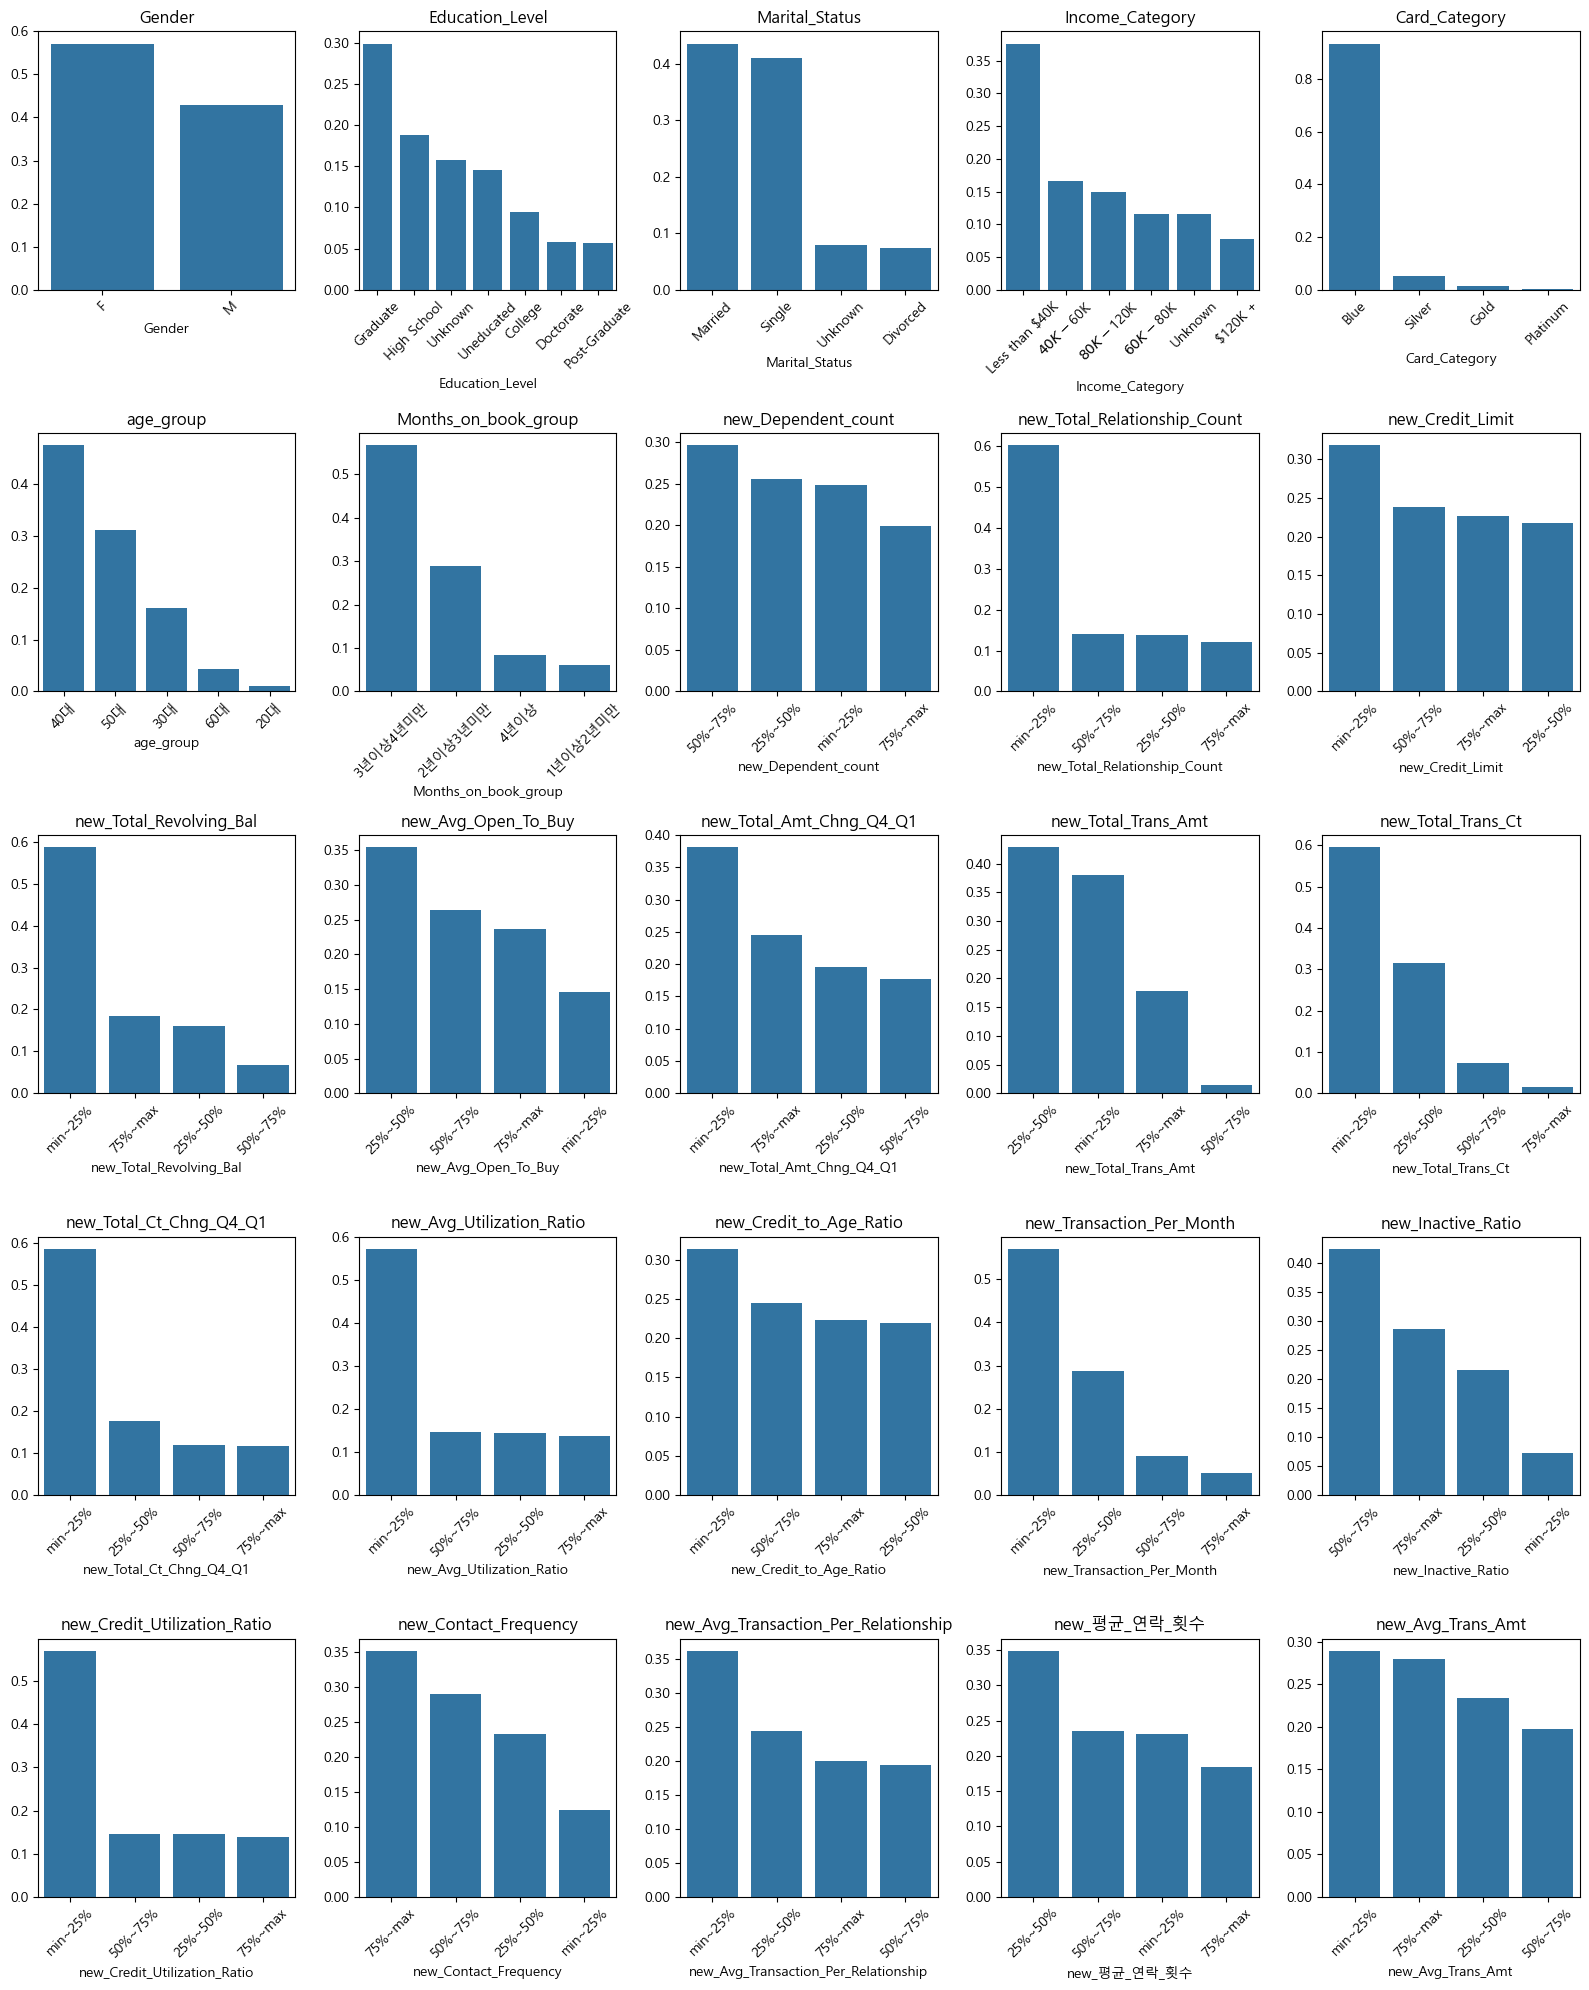

In [16]:
## 5개씩 출력
cols = list(df.describe(include='O').columns[1:]) ## Attrition_Flag를 제외하고 출력
fig, axes = plt.subplots(5, 5, figsize=(16, 20))

for i, col in enumerate(cols):  
    counts = attrited[col].value_counts(normalize=True).values
    categories = attrited[col].value_counts(normalize=True).index
    
    sns.barplot(x=categories, y=counts, ax=axes[i//5, i%5])
    axes[i//5, i%5].tick_params(axis='x', rotation=45)
    axes[i//5, i%5].set_title(col)
    
plt.tight_layout()
plt.show()

# 이탈 그룹 vs 비이탈 그룹 시각화

## 여기에서 비이탈 vs 이탈의 차이를 파악할 수 있는 변수를 찾아서 해당 변수들끼리 관계를 살펴볼 수 있다.

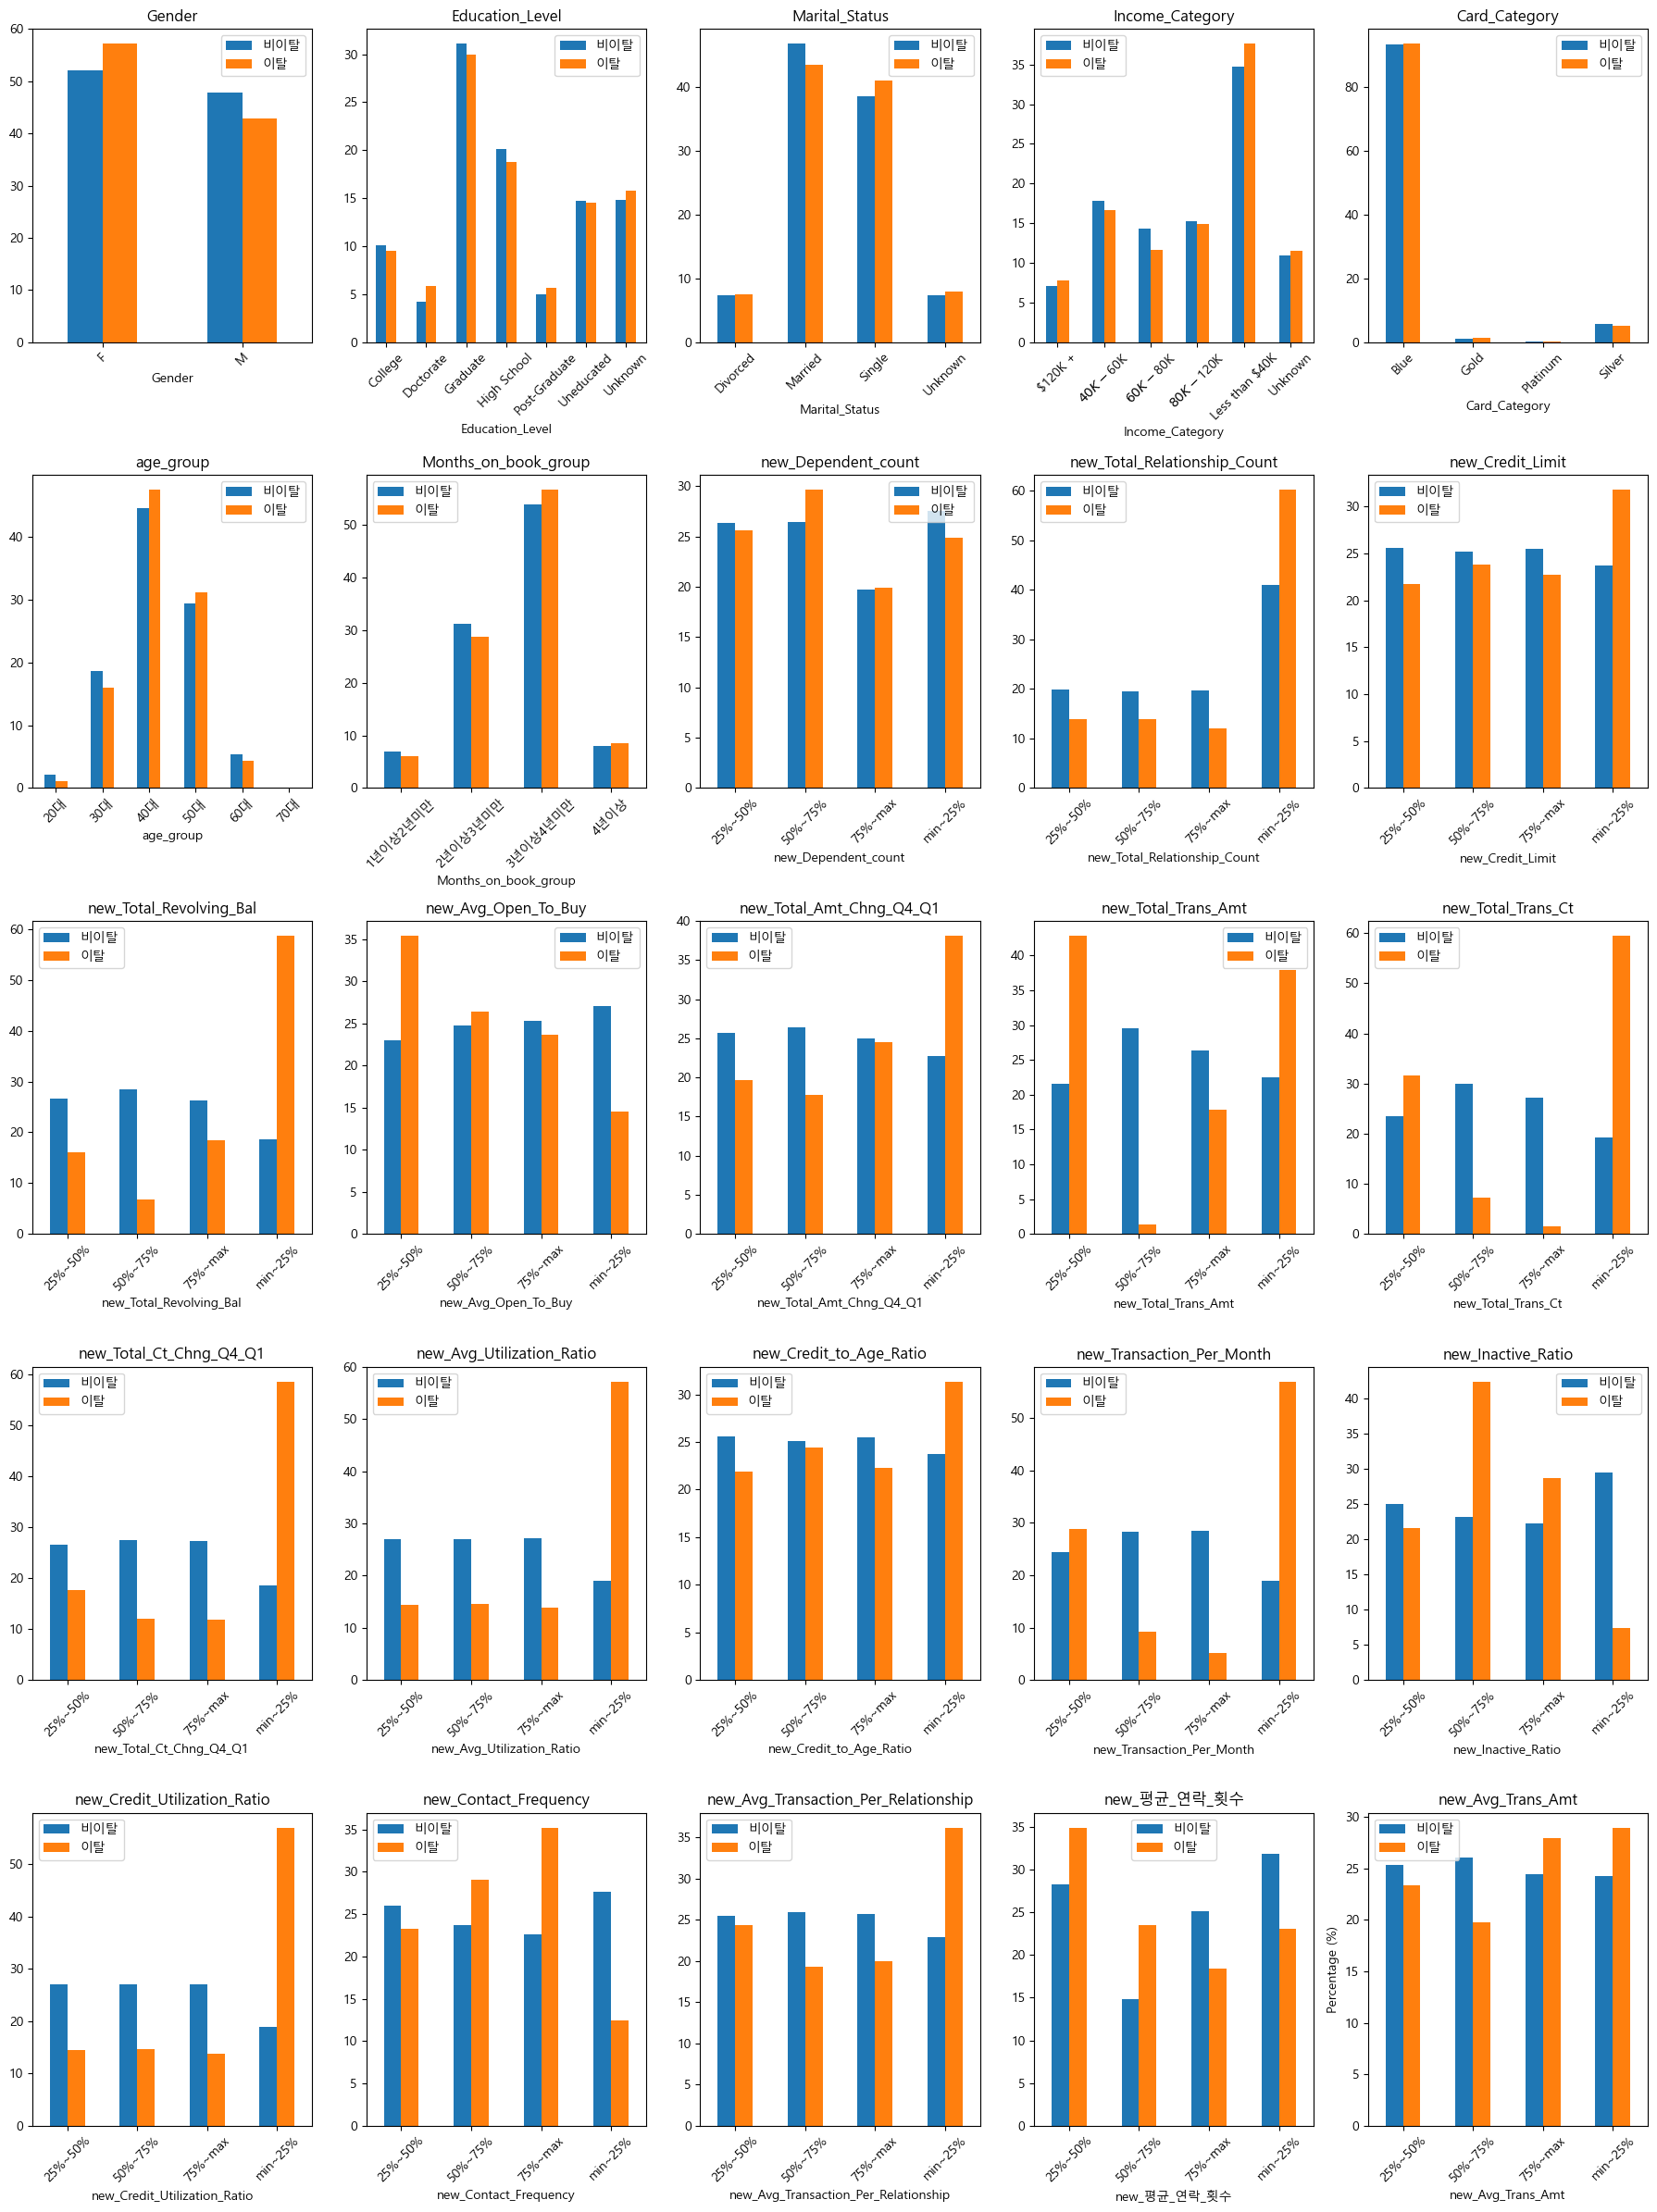

In [17]:
cols = list(df.describe(include='O').columns[1:])
fig, axes = plt.subplots(5, 5, figsize=(18, 24))

## 5개씩 출력 한 번에 비교하기 용이
for i in range(len(cols)):
    grouped_a = existing.groupby(cols[i]).size() / len(existing) * 100
    grouped_b = attrited.groupby(cols[i]).size() / len(attrited) * 100
        
    result = pd.DataFrame({'비이탈': grouped_a, '이탈': grouped_b})
    result.plot(kind='bar', ax=axes[i//5, i%5])
    
    plt.xlabel(cols[i])
    plt.ylabel('Percentage (%)')
    axes[i//5, i%5].set_title(cols[i])
    axes[i//5, i%5].tick_params(axis='x', rotation=45)
    
plt.tight_layout()
plt.show()

## 차이가 있는 변수 분석
- 'new_Total_Trans_Ct'- 총 거래 횟수 (4구간으로 나눈 변수)
- 'Card_Category' - 카드 종류
- 'new_Total_Revolving_Bal'- 고객의 회전잔액 총액 + 소득 수준 + 총 거래
- 'new_Total_Ct_Chng_Q4_Q1'- 4분기에서 1분기로의 총 거래 횟수 변동
- 'Months_on_book_group'- 고객이 신용카드를 사용한 기간
- 'new_Avg_Utilization_Ratio'- 평균 이용률 비율
- 'new_Transaction_Per_Month'- 한 달 동안 거래 횟수 (4구간으로 나눈 변수)
- 'Credit_Utilization_Ratio'- 고객이 신용 한도 중 얼마나 많은 비율을 사용하고 있는지를 나타냅니다. 신용 한도를 많이 사용하는 고객은 이탈할 가능성이 더 높을 수 있습니다.

In [18]:
# find_cols = ['new_Total_Trans_Ct','Card_Category','new_Total_Revolving_Bal','new_Total_Ct_Chng_Q4_Q1','Months_on_book_group','new_Avg_Utilization_Ratio','new_Transaction_Per_Month','Credit_Utilization_Ratio']
# find_cols

In [19]:
## 중복된 값이 있는 컬럼은 삭제
cols = df.describe().columns.tolist()
cols.remove('Customer_Age')  ## 이미 범주화 
cols.remove('Months_on_book') ## 이미 범주화
cols.remove('Contacts_Count_12_mon') ## 중복된 quantile 값이 있음
cols.remove('Months_Inactive_12_mon') ## 중복된 quantile 값이 있음

## 
object_df = df.drop(columns=cols)
object_df.head()

,Attrition_Flag,Customer_Age,Gender,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Months_Inactive_12_mon,Contacts_Count_12_mon,...,new_Total_Ct_Chng_Q4_Q1,new_Avg_Utilization_Ratio,new_Credit_to_Age_Ratio,new_Transaction_Per_Month,new_Inactive_Ratio,new_Credit_Utilization_Ratio,new_Contact_Frequency,new_Avg_Transaction_Per_Relationship,new_평균_연락_횟수,new_Avg_Trans_Amt
0,Existing Customer,45,M,High School,Married,$60K - $80K,Blue,39,1,3,...,75%~max,25%~50%,75%~max,min~25%,min~25%,25%~50%,50%~75%,min~25%,75%~max,min~25%
1,Existing Customer,49,F,Graduate,Single,Less than $40K,Blue,44,1,2,...,75%~max,25%~50%,50%~75%,min~25%,min~25%,25%~50%,min~25%,min~25%,75%~max,min~25%
2,Existing Customer,51,M,Graduate,Married,$80K - $120K,Blue,36,1,0,...,75%~max,min~25%,25%~50%,min~25%,min~25%,min~25%,min~25%,min~25%,min~25%,75%~max
3,Existing Customer,40,F,High School,Unknown,Less than $40K,Blue,34,4,1,...,75%~max,75%~max,25%~50%,min~25%,75%~max,75%~max,min~25%,min~25%,min~25%,50%~75%
4,Existing Customer,40,M,Uneducated,Married,$60K - $80K,Blue,21,1,0,...,75%~max,min~25%,50%~75%,25%~50%,25%~50%,min~25%,min~25%,min~25%,min~25%,min~25%


## 통계적 검정

In [20]:
from scipy.stats.contingency import association
from scipy.stats import chi2_contingency

### **범주형 변수 1개의 상관분석 - Cramer V계수**

In [21]:
def corr_cramer(x):
    new_tab = pd.crosstab(object_df.Attrition_Flag, object_df[x])
    result = association(new_tab, method="cramer")
    return result

In [22]:
columns = object_df.columns[1:].tolist()

for col in columns:
    if corr_cramer(col) > 0.3:
        print(col, "상관계수:", np.round(corr_cramer(col), 5))

new_Total_Revolving_Bal 상관계수: 0.34899
new_Total_Trans_Ct 상관계수: 0.39052
new_Total_Ct_Chng_Q4_Q1 상관계수: 0.34143
new_Avg_Utilization_Ratio 상관계수: 0.32366
new_Transaction_Per_Month 상관계수: 0.35853
new_Credit_Utilization_Ratio 상관계수: 0.32371


### **범주형 변수의 독립성 분석 - 카이제곱 검정**

In [23]:
def corr_chi2(x):
    new_tab = pd.crosstab(object_df[x], object_df.Attrition_Flag)
    chi2, p, _, _ = chi2_contingency(new_tab)
    return np.round(chi2, 5), np.round(p, 5)

In [24]:
columns = object_df.columns[1:].tolist()
# columns = df.columns[1:].tolist() ## 원본 데이터

for col in columns:
    if corr_chi2(col)[1] < 0.05: ## 0.05 보다 작은 유의미한 변수
        print(col)
        print(corr_chi2(col))

Customer_Age
(65.13198, 0.02083)
Gender
(13.86561, 0.0002)
Income_Category
(12.83226, 0.025)
Months_Inactive_12_mon
(396.4562, 0.0)
Contacts_Count_12_mon
(586.63848, 0.0)
age_group
(19.83118, 0.00134)
new_Dependent_count
(8.93414, 0.03018)
new_Total_Relationship_Count
(207.00887, 0.0)
new_Credit_Limit
(48.61317, 0.0)
new_Total_Revolving_Bal
(1233.40587, 0.0)
new_Avg_Open_To_Buy
(172.27989, 0.0)
new_Total_Amt_Chng_Q4_Q1
(189.01308, 0.0)
new_Total_Trans_Amt
(851.02123, 0.0)
new_Total_Trans_Ct
(1544.43556, 0.0)
new_Total_Ct_Chng_Q4_Q1
(1180.57378, 0.0)
new_Avg_Utilization_Ratio
(1060.87486, 0.0)
new_Credit_to_Age_Ratio
(44.58819, 0.0)
new_Transaction_Per_Month
(1301.7918, 0.0)
new_Inactive_Ratio
(480.54903, 0.0)
new_Credit_Utilization_Ratio
(1061.1781, 0.0)
new_Contact_Frequency
(232.15073, 0.0)
new_Avg_Transaction_Per_Relationship
(138.78447, 0.0)
new_평균_연락_횟수
(144.30524, 0.0)
new_Avg_Trans_Amt
(42.4681, 0.0)


### **카이제곱 검정 + Cramer 검정**

In [25]:
columns = object_df.columns[1:].tolist()
variable = {}

for col in columns:
    if corr_chi2(col)[1] < 0.05: ## 0.05 보다 작은 유의미한 변수
        if corr_cramer(col) > 0.3:
            variable[col] = np.round(corr_cramer(col), 5)

In [26]:
sorted_variable = dict(sorted(variable.items(), key=lambda x: x[1], reverse=True))
find_cols = sorted_variable.keys()

for key, value in sorted_variable.items():
    print(key, "상관계수:", value)

new_Total_Trans_Ct 상관계수: 0.39052
new_Transaction_Per_Month 상관계수: 0.35853
new_Total_Revolving_Bal 상관계수: 0.34899
new_Total_Ct_Chng_Q4_Q1 상관계수: 0.34143
new_Credit_Utilization_Ratio 상관계수: 0.32371
new_Avg_Utilization_Ratio 상관계수: 0.32366


## 검정 결과로 나온 변수 시각화

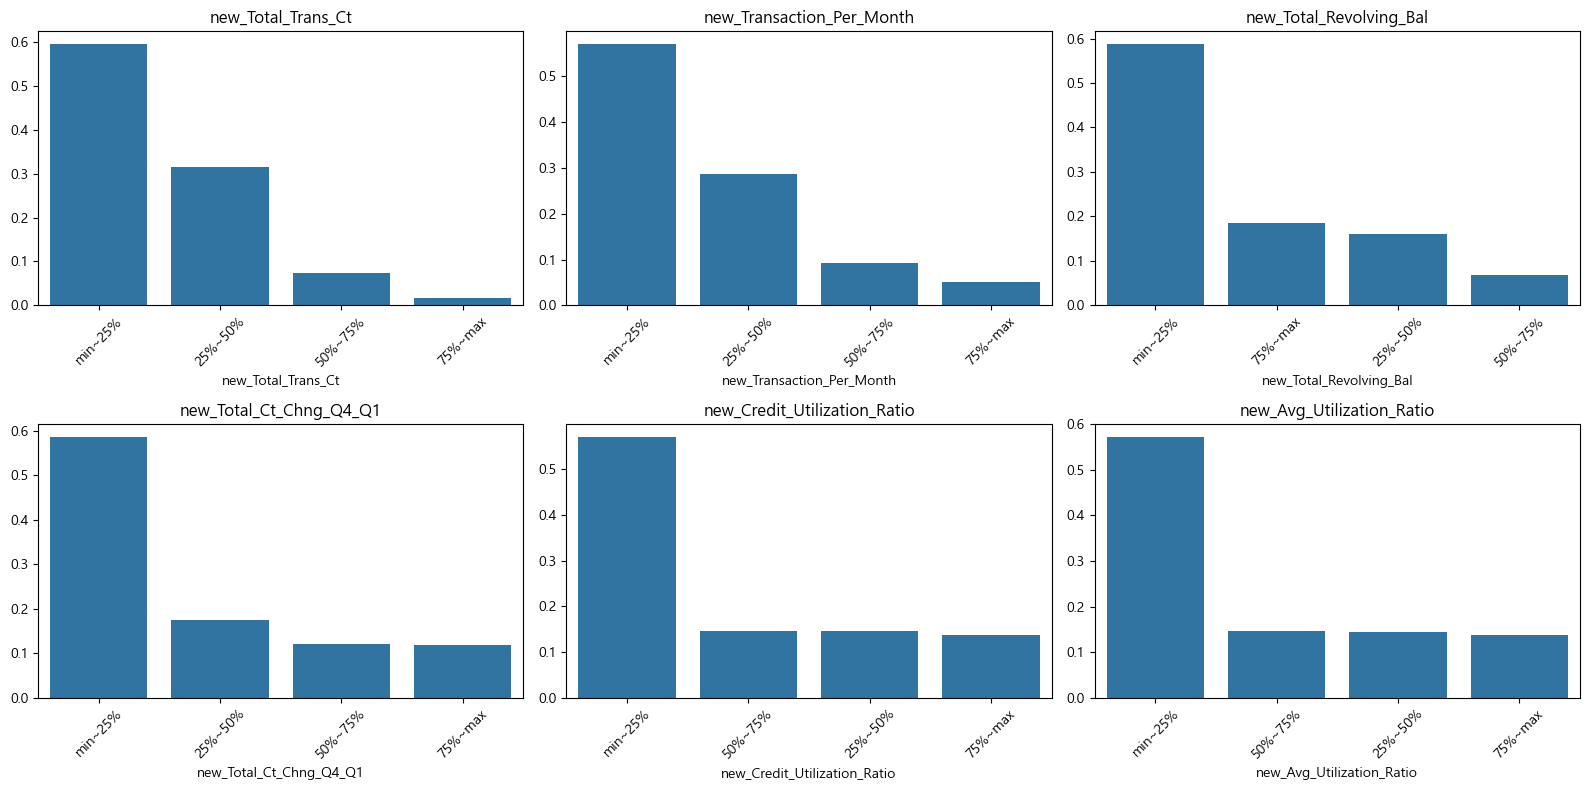

In [27]:
fig, axes = plt.subplots(2, 3, figsize=(16, 8))

for i, col in enumerate(find_cols):  
    counts = attrited[col].value_counts(normalize=True).values
    categories = attrited[col].value_counts(normalize=True).index
    
    sns.barplot(x=categories, y=counts, ax=axes[i//3, i%3])
    axes[i//3, i%3].tick_params(axis='x', rotation=45)
    axes[i//3, i%3].set_title(col)
    
plt.tight_layout()
plt.show()

### **범주형 변수들의 집단간 상관분석 - Cramer V계수**
해당 부분은 수정이 더 필요

In [28]:
# new_tab = pd.crosstab([np.array(object_df.age_group ), np.array(object_df.new_Total_Revolving_Bal), np.array(object_df.Gender), np.array(object_df.new_Total_Trans_Ct), np.array(object_df.new_Total_Trans_Amt)],np.array(object_df.Attrition_Flag))
new_tab = pd.crosstab([np.array(object_df.new_Total_Revolving_Bal ), np.array(object_df.new_Total_Trans_Ct), np.array(object_df.new_Total_Trans_Amt)],np.array(object_df.Attrition_Flag))

result = association(new_tab, method="cramer")
print(result)

new_tab = pd.crosstab([np.array(object_df.new_Total_Revolving_Bal ), np.array(object_df.new_Total_Trans_Ct), np.array(object_df.new_Total_Trans_Amt)],np.array(object_df.Attrition_Flag))

chi2, p, _, _ = chi2_contingency(new_tab)
print(chi2, p)

0.6541527948268361
4333.504106428037 0.0


## **모델링**

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score ## 모델 성능 평가 (평균제곱 오차 및 R-squared)

model = RandomForestClassifier(random_state=2024)

In [30]:
y = df['Attrition_Flag'].map({'Existing Customer': 0, 'Attrited Customer': 1})
x = df.drop(columns='Attrition_Flag')

# 원핫 인코딩 적용
encoded_df = pd.get_dummies(x)

# 학습 데이터와 검증 데이터로 분할
x_train, x_val, y_train, y_val = train_test_split(encoded_df, y, test_size=0.2, stratify=y, random_state=2024)

# RandomForestRegressor 모델 학습
model.fit(x_train, y_train)

RandomForestClassifier(random_state=2024)

In [31]:
## model predict 진행
y_pred = model.predict(x_val)

# 정확도 계산
accuracy = accuracy_score(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred) # (실제값, 예측값)
r2 = r2_score(y_val, y_pred) # (실제값, 예측값)

# mse
print("모델의 mse:", mse)

# r2
print("모델의 r2:", r2)

# rmse
print("모델의 rmse:", mse**0.5)

print("모델의 성능:", model.score(x_val, y_val))
print("정확도:", accuracy)

모델의 mse: 0.050345508390918066
모델의 r2: 0.6261891195224528
모델의 rmse: 0.2243780479256339
모델의 성능: 0.9496544916090819
정확도: 0.9496544916090819


In [32]:
# 로지스틱 회귀분석
import statsmodels.api as sm
# 'Attrition_Flag' 변수를 0과 1로 변환
y = df['Attrition_Flag'].map({'Existing Customer': 0, 'Attrited Customer': 1})

new_ = df.describe().columns.tolist()

x = df[new_]
x = sm.add_constant(x)

logit_model = sm.Logit(y, x)
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.218574
         Iterations 26
                           Logit Regression Results                           
Dep. Variable:         Attrition_Flag   No. Observations:                10127
Model:                          Logit   Df Residuals:                    10104
Method:                           MLE   Df Model:                           22
Date:                Mon, 22 Jan 2024   Pseudo R-squ.:                  0.5041
Time:                        16:28:08   Log-Likelihood:                -2213.5
converged:                       True   LL-Null:                       -4463.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                                4.6090      0.740      6.2